# Discover Data Using the Landsat Spatio Temoporal Asset Catalog (STAC)

The Spatio Temporal Asset Catalog (STAC) family of specifications standardizes the way geospatial metadata is structured to better enable data querying. The United States Geological Survey (USGS) utilizes STAC to better enable the search and discovery of Landsat data by providing STAC metadata for every Landsat data product accessible through the Amazon Web Services (AWS) cloud platform. All Landsat data products are located in an Amazon Simple Storage Service (S3) bucket within the Oregon us-west-2 region. 

This tutorial serves as a basic introduction to STAC objects, specifications, and structure through examples of querying USGS Collection 2 Landsat data using the Landsat STAC API. For the purposes of this tutorial, an AWS account is not required as no data from the AWS S3 location is retrieved or accessed, only the STAC items associated with products. 

## Topics Covered

1. [Getting Started](#Getting-Started) <br>
   1.1 [What is STAC?](#What-is-STAC?) <br>
   1.2 [Import Packages](#Import-Packages) <br>
2. [Goving Over the STAC Basics](#STAC-Basics) <br>
    2.1 [Read the Documentation](#Documentation) <br>
    2.2 [STAC API](#STAC-API) <br>
    2.3 [Catalog](#Catalog) <br>
    2.4 [Collection](#Collection) <br>
    2.5 [Item](#Item) <br>
3. [Using the Landsat STAC API to Search for Data](#Landsat-API) <br>
    3.1 [Spatial Querying](#Spatial-Querying) <br>
    3.2 [Temporal Querying](#Temporal-Querying) <br>
    3.3 [Using item metadata fields to adjust search parameters](#Query) <br>
4. [What's Next?](#Whats-Next)<br>
    4.1 [Using LandsatLook to test queries](#LandsatLook)

------

## 1. Getting Started <a id="Getting-Started"></a>

### 1.1 What is STAC? <a id="What-is-STAC?"></a>
> "The STAC specification provides a common language to describe a range of geospatial information, so it can more easily be indexed and discovered. A 'spatiotemporal asset' is any file that represents information about the earth captured in a certain space and time." (https://stacspec.org/)

**Four STAC Specifications:**
1. <b>STAC API</b>
<br> A STAC API is a dynamic version of a Spatio Temporal Asset Catalog that returns a STAC Catalog, Collection, or Item depending on the endpoint. In the case of Landsat, the official USGS Landsat Collection 2 STAC API returns a STAC Catalog that contains information about Landsat Collection 2 data available.
<br>

2. <b>STAC Catalog</b>
<br>A STAC Catalog represents a logical group of other STAC Catalogs, Collections, or Item objects. A Catalog is commonly used as an entry point into a STAC Catalog and are used for exploratory purposes. The official USGS Landsat Collection 2 STAC API ('https://landsatlook.usgs.gov/stac-server') is used to return the Landsat stac-server catalog in this tutorial.
<br>
3. <b>STAC Collection</b>
<br>A STAC Collection is a group of items or a dataset that share properties and metadata. All STAC Collections are defined by a common set of fields that are used to describe the dataset in addition to the fields shared by the STAC Catalog. The Landsat STAC API contains several STAC Collections of Landsat data, grouped by product type.
<br>
4. <b>STAC Item</b>
<br>A STAC Item is a GeoJSON Feature augmented with data information relevant to the STAC Item. Fields within the Item include time range and assets of the item. At their core, items contain standardized metadata about data that enables any client to search or crawl online catalogs of spatial 'assets.' In the case of Landsat, 'assets' within a Landsat item are product bands, product metadata files, or browse images.
<br>

For more in-depth documentation on STAC definitions and features currently supported, we will make a request to the base stac-server URL at the beginning of the tutorial.

###  1.2 Import packages required to run this tutorial <a id="Import-Packages"></a>

Since we won't be working with any Landsat product data, the only package required for this tutorial is requests, which we will use to perform GET and POST requests to the Landsat STAC API

In [1]:
import requests as r

## 2. Working with STAC: The Basics <a id="STAC-Basics"></a>
This section introduces the four major components of STAC using the Landsat STAC API. 

### 2.1 Read the Documentation <a id="Documentation"></a>
STAC-API is self documenting and the best way to access the correct documentation is to make a GET request to the base stac-server URL. This will return a list of all the documentation for features that are currently supported by the server.

Start by setting the base stac-server URL to a variable and make a GET request to access the base stac-server URL.

In [2]:
stac = 'https://landsatlook.usgs.gov/stac-server' # Landsat STAC API Endpoint
stac_response = r.get(stac).json()            # Call the STAC API endpoint
stac_response             # print out the response from the base stac-server URL

{'stac_version': '1.0.0',
 'type': 'Catalog',
 'id': 'stac-server',
 'title': 'STAC API',
 'description': 'Production STAC API using stac-server',
 'links': [{'rel': 'self',
   'type': 'application/json',
   'href': 'https://landsatlook.usgs.gov/stac-server/'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'https://landsatlook.usgs.gov/stac-server/'},
  {'rel': 'conformance',
   'type': 'application/json',
   'href': 'https://landsatlook.usgs.gov/stac-server/conformance'},
  {'rel': 'data',
   'type': 'application/json',
   'href': 'https://landsatlook.usgs.gov/stac-server/collections'},
  {'rel': 'search',
   'type': 'application/geo+json',
   'href': 'https://landsatlook.usgs.gov/stac-server/search'},
  {'rel': 'service-desc',
   'type': 'application/vnd.oai.openapi',
   'href': 'https://landsatlook.usgs.gov/stac-server/api'},
  {'rel': 'service-doc',
   'type': 'text/html',
   'href': 'https://landsatlook.usgs.gov/stac-server/api.html'},
  {'rel': 'docs',
   'href': 'h

Within the 'links' and 'conformsTo' properties, there are many useful links to documentation and information about features currently supported by the server. In particular, https://stac-utils.github.io/stac-server/ and https://landsatlook.usgs.gov/stac-server/api.html are good resources for those starting out with STAC.

In [3]:
print([[l['href'] for l in stac_response['links'] if l['rel'] == 'docs'][0]])
print([[l['href'] for l in stac_response['links'] if l['rel'] == 'service-doc'][0]])

['https://stac-utils.github.io/stac-server/']
['https://landsatlook.usgs.gov/stac-server/api.html']


### 2.2 STAC API <a id="STAC-API"></a>

In addition to links to the documentation, there is useful information returned about the STAC API and the Landsat Collection 2 Data Catalog. Print information about the catalog from the returned response.

In [4]:
print(f"Landsat STAC API Information: \nStac Version: {stac_response['stac_version']}")
print(f"Title: {stac_response['title']} \nID:{stac_response['id']}")
print(f"Type: {stac_response['type']} \nDescription: {stac_response['description']}")
print(f"Links: {len(stac_response['links'])}")

Landsat STAC API Information: 
Stac Version: 1.0.0
Title: STAC API 
ID:stac-server
Type: Catalog 
Description: Production STAC API using stac-server
Links: 22


### 2.3 STAC Catalog <a id="Catalog"></a>

The Landsat STAC Catalog is a JSON file that contains links and information about the Landsat collections that are available. Print the links in the STAC Catalog and the link relationship to the 'root' Landsat STAC Catalog for a list of what is in the catalog. The 'child' items are the collections of Landsat data that are available in the catalog.

In [5]:
catalog_links = stac_response['links']
for l in catalog_links: 
    try: 
        print(f"{l['href']} is a {l['rel']} item")
    except:
        print(f"{l['href']}")      

https://landsatlook.usgs.gov/stac-server/ is a self item
https://landsatlook.usgs.gov/stac-server/ is a root item
https://landsatlook.usgs.gov/stac-server/conformance is a conformance item
https://landsatlook.usgs.gov/stac-server/collections is a data item
https://landsatlook.usgs.gov/stac-server/search is a search item
https://landsatlook.usgs.gov/stac-server/api is a service-desc item
https://landsatlook.usgs.gov/stac-server/api.html is a service-doc item
https://stac-utils.github.io/stac-server/ is a docs item
https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l2-sr is a child item
https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l2-st is a child item
https://landsatlook.usgs.gov/stac-server/collections/landsat-c2ard-st is a child item
https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l2alb-bt is a child item
https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l3-fsca is a child item
https://landsatlook.usgs.gov/stac-server/collectio

### 2.4 STAC Collections <a id="Collection"></a>

For more information about each collection, you can use the 'https://landsatlook.usgs.gov/stac-server/collections' endpoint. This is another STAC Catalog that contains more in-depth information about each of the collections of Landsat data available. 

In [6]:
# set the endpoint containing all the collections to a variable 
landsat_collections = [l['href'] for l in catalog_links if l['rel'] == 'data'][0]

# call the endpoint and store the response
collections_response = r.get(f"{landsat_collections}").json()

# print the number of collections available
print(f"Number of Landsat collections available: {len(collections_response['collections'])}")

Number of Landsat collections available: 14


Print the titles of the available collections and their respective id and endpoint. In STAC, the 'id' field is important because it can be used for querying by a specific product.

In [7]:
collections = collections_response['collections']

for c in collections:
    print(f"{c['title']} ({c['id']}): \n {c['links'][0]['href']}")

Landsat Collection 2 Level-2 UTM Surface Reflectance (SR) Product (landsat-c2l2-sr): 
 https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l2-sr
Landsat Collection 2 Level-2 UTM Surface Temperature (ST) Product (landsat-c2l2-st): 
 https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l2-st
Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Surface Temperature (ST) Product (landsat-c2ard-st): 
 https://landsatlook.usgs.gov/stac-server/collections/landsat-c2ard-st
Landsat Collection 2 Level-2 Albers Top of Atmosphere Brightness Temperature (BT) Product (landsat-c2l2alb-bt): 
 https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l2alb-bt
Landsat Collection 2 Level-3 Fractional Snow Covered Area (fSCA) Product (landsat-c2l3-fsca): 
 https://landsatlook.usgs.gov/stac-server/collections/landsat-c2l3-fsca
Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Top of Atmosphere Brightness Temperature (BT) Product (landsat-c2ard-bt): 
 https://landsatl

Information for a specific collection can be retreived to explore the attribute data of the collection. The example below grabs STAC collection information for a Landsat Collection 2 data product at index position 1 in the collections variable.

In [9]:
collections[0]

{'id': 'landsat-c2l2-sr',
 'type': 'Collection',
 'stac_version': '1.0.0',
 'stac_extensions': ['https://stac-extensions.github.io/view/v1.0.0/schema.json',
  'https://stac-extensions.github.io/item-assets/v1.0.0/schema.json'],
 'title': 'Landsat Collection 2 Level-2 UTM Surface Reflectance (SR) Product',
 'description': "The Landsat Surface Reflectance (SR) product measures the fraction of incoming solar radiation that is reflected from Earth's surface to the Landsat sensor.",
 'keywords': ['landsat',
  'landsat 4',
  'landsat 5',
  'landsat 7',
  'landsat 8',
  'landsat 9',
  'surface reflectance'],
 'extent': {'spatial': {'bbox': [[-180, -90, 180, 90]]},
  'temporal': {'interval': [['1982-08-22T00:00:00.000Z', None]]}},
 'providers': [{'name': 'U.S. Geological Survey (USGS) Earth Resources Observation and Science (EROS) Center',
   'roles': ['producer', 'processor', 'host'],
   'url': 'https://eros.usgs.gov/'}],
 'license': 'https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladiu

### 2.5 STAC Items <a id="Item"></a>
The STAC Items within collections represent Landsat data products and metadata information about that product. After exploring the collections of Landsat data that are available, you can query a specific collection to discover items within the collection.

Continue using the Landsat Collection 2 products at index position 1 to query the collection for items.

In [10]:
LP = collections[0] # Grab the Collection at index position 1

LP_items = [l['href'] for l in LP['links'] if l['rel'] == 'items'][0]    # Set the items endpoint to variable

LP_items_response = r.get(LP_items).json()     # Call the items endpoint

LP_item = LP_items_response['features'][0]     # select the first item returned (by default, 10 items are returned)

LP_item

{'type': 'Feature',
 'stac_version': '1.0.0',
 'stac_extensions': ['https://landsat.usgs.gov/stac/landsat-extension/v1.1.1/schema.json',
  'https://stac-extensions.github.io/view/v1.0.0/schema.json',
  'https://stac-extensions.github.io/projection/v1.0.0/schema.json',
  'https://stac-extensions.github.io/eo/v1.0.0/schema.json',
  'https://stac-extensions.github.io/alternate-assets/v1.1.0/schema.json',
  'https://stac-extensions.github.io/storage/v1.0.0/schema.json',
  'https://stac-extensions.github.io/accuracy/v1.0.0/schema.json',
  'https://stac-extensions.github.io/card4l/v0.1.0/optical/schema.json',
  'https://stac-extensions.github.io/classification/v1.0.0/schema.json'],
 'id': 'LC09_L2SP_089090_20230330_20230401_02_T1_SR',
 'description': 'Landsat Collection 2 Level-2 Surface Reflectance Product',
 'bbox': [147.30997347788764,
  -44.24282423279042,
  150.1638442080633,
  -42.12677911482912],
 'geometry': {'type': 'Polygon',
  'coordinates': [[[147.92331356318772, -42.126779114829

The STAC item metadata contains userful information about the Landsat product, including product ID, date acquired, spacecraft, cloud cover precentage, number of assets.

In [11]:
# Print some of the  metadata attributes for the product

print(f"Product Family: {LP_item['description']}")
print(f"Product ID: {LP_item['id']}")
print(f"Acquisition Date: {LP_item['properties']['datetime']}")
print(f"Spacecraft (Platform): {LP_item['properties']['platform']}")
print(f"Cloud Cover: {LP_item['properties']['eo:cloud_cover']}%.")
print(f"Number of assets: {len(LP_item['assets'])} assets")

Product Family: Landsat Collection 2 Level-2 Surface Reflectance Product
Product ID: LC09_L2SP_089090_20230330_20230401_02_T1_SR
Acquisition Date: 2023-03-30T23:46:28.077546Z
Spacecraft (Platform): LANDSAT_9
Cloud Cover: 59.13%.
Number of assets: 17 assets


Going a step further, you can print information about the assets within the item.

In [12]:
for a in LP_item['assets']:
    try:
        print(f"Asset: {LP_item['assets'][a]['title']}")
        print(f"type: {LP_item['assets'][a]['type']}")
        print(f"Description: {LP_item['assets'][a]['description']}")
        print(f"Role: {LP_item['assets'][a]['roles']}")
        print(f"S3 URL: {LP_item['assets'][a]['alternate']['s3']['href']}")
        print("\n")

    except:
        print(f"Role: {LP_item['assets'][a]['roles']}")
        print(f"URL: {LP_item['assets'][a]['href']}")
        print("\n")
        continue

Asset: Thumbnail image
type: image/jpeg
Role: ['thumbnail']
URL: https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2023/089/090/LC09_L2SP_089090_20230330_20230401_02_T1/LC09_L2SP_089090_20230330_20230401_02_T1_thumb_small.jpeg


Asset: Reduced resolution browse image
type: image/jpeg
Role: ['overview']
URL: https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2023/089/090/LC09_L2SP_089090_20230330_20230401_02_T1/LC09_L2SP_089090_20230330_20230401_02_T1_thumb_large.jpeg


Asset: HTML index page
type: text/html
Role: ['metadata']
URL: https://landsatlook.usgs.gov/stac-browser/collection02/level-2/standard/oli-tirs/2023/089/090/LC09_L2SP_089090_20230330_20230401_02_T1/LC09_L2SP_089090_20230330_20230401_02_T1


Asset: Product Metadata File (json)
type: application/json
Description: Collection 2 Level-2 Product Metadata File (json)
Role: ['metadata']
S3 URL: s3://usgs-landsat/collection02/level-2/standard/oli-tirs/2023/089/090/LC09_L2SP_089090_2023

As you can see, within each STAC item associated with a Landsat product, there is 'asset' infromation available. The assets within Landsat STAC items are the data associated with the Landsat prodcut, typically the data layers and product metadata files. Each of the assests contains a description, role, and a link to its location in the AWS S3 storage bucket.

## 3. Searching for Landsat Data <a id="Landsat-API"></a>
Now that the basics of STAC structure have been covered, the Landsat stac-search endpoint (listed in the Landsat STAC Catalog) can be used to query the API based on parameters specified by a user. Search parameters are specified during POST requests to the search endpoint.

In [ ]:
search = [l['href'] for l in catalog_links if l['rel'] == 'search'][0]   #retreive search endpoint from STAC Catalog

# create an empty dictionary for paramters to pass into the search endpoint
params = {}

https://stac-utils.github.io/stac-server/, the 'docs' URL or https://landsatlook.usgs.gov/stac-server/api.html, the 'service-doc' URL, both retrieved from the base stac-server URL in [Section 2.1](#Documentation) are the documentation links contianing more information on search parameters available. Click on "Schemas" in the left hand navigation on the https://stac-utils.github.io/stac-server/ page to get more information about using the different search parameters.

For now, here is a high level summary of the core parameters for STAC search:

| Parameter | Type | Description |
| :- | :- | :- |
| limit | integer | The maximum number of results to return (page size).
| bbox | [number] | Requested bounding box.
| datetime | string | Single date+time, or a range ('/' separator), formatted to [RFC 3339, section 5.6.](https://tools.ietf.org/html/rfc3339#section-5.6) Use double dots .. for open date ranges.
| intersects | GeoJSON / Geometry | Searches items by performing intersection between their geometry and provided GeoJSON geometry. All GeoJSON geometry types must be supported.
| ids | [string] | Array of Item ids to return.
| collections | [string] | Array of one or more Collection IDs that each matching Item must be in.

By default, a request to the stac-search returns the first 10 items. The Landsat stac-search endpoint allows for a limit of up to 10,000 items to be returned by setting the limit parameter. For the purposes of this tutorial, we will set the limit parameter to return the first 400 items.

In [ ]:
params['limit'] = 400 # pass in 400 as a value and limit as a key to the params dictionary
print(params)

### 3.1 Spatial Querying <a id="Spatial-Querying"></a>

There are several ways to query the stac-search using spatial information. In this tutorial, we will explore using bounding box information to query for our area of interest. We can manually pass in a list of floating point numbers that represent x-min, y-min, x-max, and y-max coordinates for a bounding box. This list of bbox coordinates is passed into the params dictionary and the query compares the bbox information to the 'bbox' property in STAC items. 

Recall that each Landsat STAC item contains 'bbox' information the represents a bounding box around active pixels

In [ ]:
LP_item['bbox']

In [ ]:
# create a list of bound box coordinates for area of interest
bbox = [-97.56546020507812,45.20332826663052,-97.2241973876953,45.52751668442124]

# assign bbox to the params dictionary
params['bbox'] = bbox

params

In [ ]:
query = r.post(search, json=params, ).json()   # send POST request to the stac-search endpoint with params passed in
print(f"Items Found: {len(query['features'])}")

### 3.2 Temporal Query <a id="Temporal-Querying"></a>
As specified in the core parameters for STAC search table above, you can also add a 'datetime' range to narrow your search.

In [ ]:
# use the specified datetime format to create string variable of desired time range
date_time = "2022-04-01T00:00:00Z/2022-05-01T23:59:59Z"

# add variable to params dictionary
params['datetime'] = date_time
params

In [ ]:
query = r.post(search, json=params).json()   # send POST request to the stac-search endpoint with new params passed in
print(f"Items Found: {len(query['features'])}")

### 3.3 Using Collection ID and STAC item metadata fields as search parameters <a id="Query"></a>
With the current parameters, when POST requests are made with the time and spatial extent specified, the search is performed on all Landsat STAC collections. However, you likely know which products you need. The desired collection can be specified by adding the collection ids to the search parameters. In the next step, a collections paramter is added to only search through the Landsat Collection 2 Level 2 Surface Reflectance and Surface Temperature products.

In [ ]:
# the collections parameter is a string object type. More than one ID can be passed in to the parameter by adding it to a list
collections = ['landsat-c2l2-sr','landsat-c2l2-st'] 

params['collections'] = collections
params

In [ ]:
query = r.post(search, json=params).json()   # send POST request to the stac-search endpoint with new params passed in
print(f"Items Found: {len(query['features'])}")

When a POST request is made, a json item is returned that contains information about the results of the request. 'features' contains the STAC items that matched the search parameters. 

In [ ]:
# print the first item to see what information is returned
query['features'][0]

It is also possible to use the metadata associated with STAC items as information in a search parameter. Let's see what attribute information can be searched on based on the information provided within a STAC item

In [ ]:
# print the keys of the properties of a STAC item
query['features'][0]['properties'].keys()

For instance, say you are only interested in Landsat 8 and Landsat 9 Level 2 Surface Reflectance and Surface Temperature products with less than 60% cloud cover. The params dictionary can be updated to include query information a based on the dictionary keys found in the properties of STAC items

In [ ]:
# add a new 'query' dictionary with the new parameters to the params dictionary
params['query'] = {'eo:cloud_cover':{'gte': 0, 'lt': 60}, 'platform': {'or':['LANDSAT_8','LANDSAT_9']}}
params

In [ ]:
query = r.post(search, json=params).json()   # send POST request to the stac-search endpoint with new params passed in
print(f"Items Found: {len(query['features'])}")

The query returns several products. Let's check to verify the new parameters from the metadata fields worked.

In [ ]:
for q in query['features']: 
    print(f"Platform: {q['properties']['platform']}, Cloud Cover: {q['properties']['eo:cloud_cover']}, Collection: {q['description']}")

It worked! The search successfully returned Surface Reflectance and Surface temperature products that meet all the parameters.

## 4. What's Next? <a id="Whats-Next"></a>

At this point, you should be able to successfully select the Landsat STAC collection you wish to query and input your own search parmeters. The next tutorial will go over the basics of selecting a subset of bands over the area of interest, loading the desired COGS into a Jupyter Notebook directly from the cloud, and working with the data.

There are many other Earth Observing datasets that utilize STAC to enable data querying. For more information on other Catalogs, visit: https://stacindex.org/catalogs

###  4.1 Using LandastLook to test queries <a id="LandsatLook"></a>

[LandsatLook](https://landsatlook.usgs.gov/) is a tool that allows rapid online viewing and access to the USGS Landsat Collection 2 data. LandsatLook leverages resources available via a commercial cloud environment including Cloud Optimized GeoTIFF (COG) and Spatio Temporal Asset Catalog (STAC) metadata. 

Using LandsatLook, you can zoom to an area of interest, click the export tab at the bottom of the map, and are able to view the query used by the tool to search STAC and load the data. Clicking the download buttom next to the Metadata search code prompts a download of a python script of the current query. This tool can be useful for getting started and testing STAC queries. 

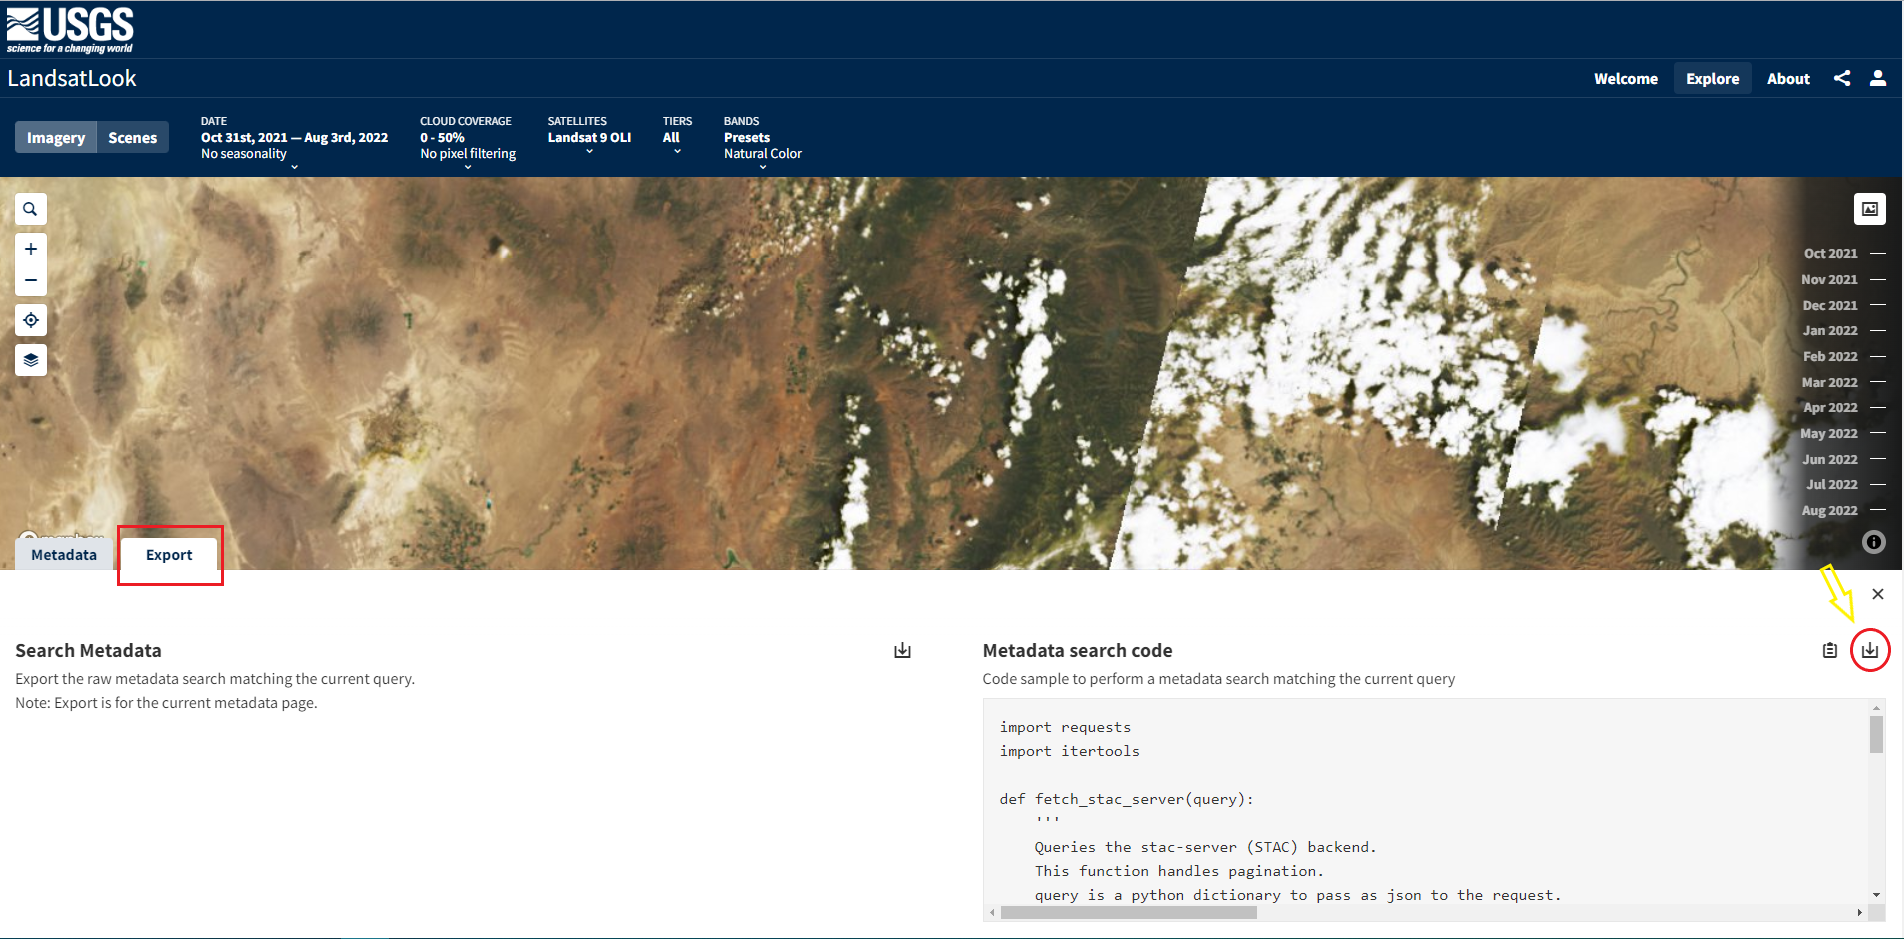

-------
For more information about Landsat Cloud Access visit: https://www.usgs.gov/landsat-missions/landsat-commercial-cloud-data-access and https://www.usgs.gov/landsat

<div class="alert alert-block alert-info">
    <h1> Contact Information </h1>
    <h3> Material developed by Holly Wilson<sup>1</sup> </h3>
    <ul>
        <b>Contact:</b> custserv@usgs.gov <br> 
        <b>Voice:</b> +1-605-594-6151 <br>
        <b>Date last modified:</b> 23 August 2022 <br>
    </ul>
        <h4> References: </h4>
    <ul>
        <b> Landsat Product Information </b> https://www.usgs.gov/landsat-missions/product-information <br>
        <b> Getting Started with Cloud-Native HLS Data in Python </b> https://lpdaac.usgs.gov/resources/e-learning/getting-started-cloud-native-hls-data-python/ <br>
        <b> Landsat Cloud Direct Access Requester Pays Tutorial  </b> https://www.usgs.gov/core-science-systems/nli/landsat/landsat-commercial-cloud-data-access <br>
    </ul>
    
<sup>1</sup>KBR Inc., contractor to the U.S. Geological Survey, Earth Resources Observation and Science (EROS) Center, Sioux Falls, South Dakota, 57198-001, USA.
Work performed under USGS contract TSSC.
</div>